In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
file_path = '/content/drive/MyDrive/Cognifyz/Dataset .csv'  # Note the space in filename
df = pd.read_csv(file_path)

In [2]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# ***Linear Regression based***

Shape of dataset: (9551, 21)
Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Data types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 objec

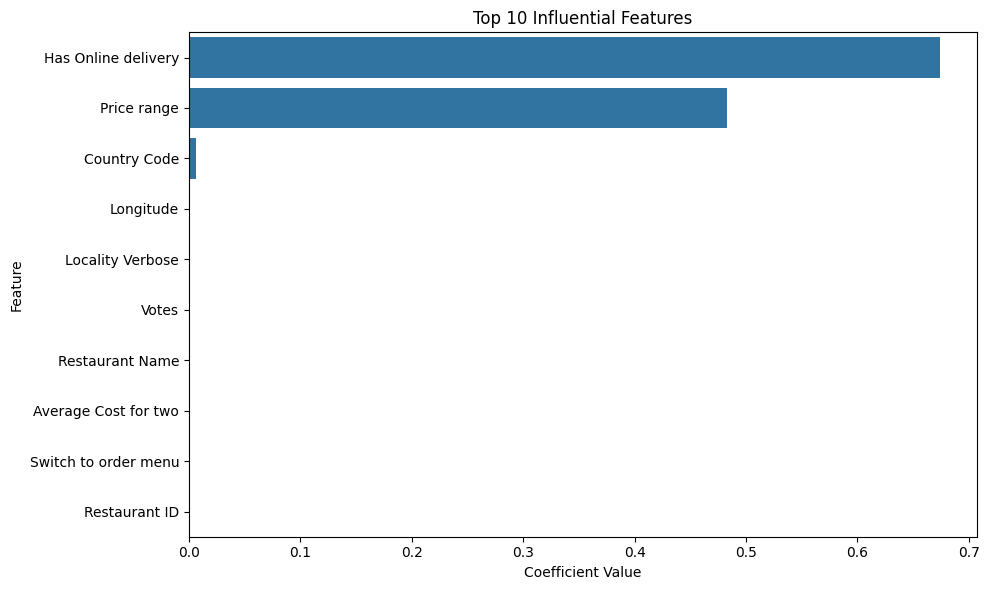

In [3]:
# Step 3: Basic EDA
print("Shape of dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

# Step 4: Handle missing values
df.dropna(inplace=True)

# Step 5: Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 6: Define features and target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 10: Feature importance (coefficients)
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nTop influential features:")
print(feature_importance.head())

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Influential Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# ***Decision Tree based***


Dataset shape: (9551, 21)

Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

📊 Model Performance:
Mean Squared Error: 0.18
R-squared: 0.92

Top Influential Features:
 Votes               0.946992
Longitude           0.015212
Latitude            0.010179
Cuisines            0.009209
Locality Verbose    0.005978
dtype: float64


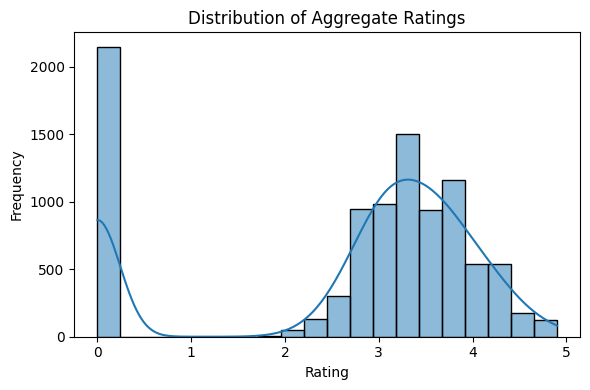

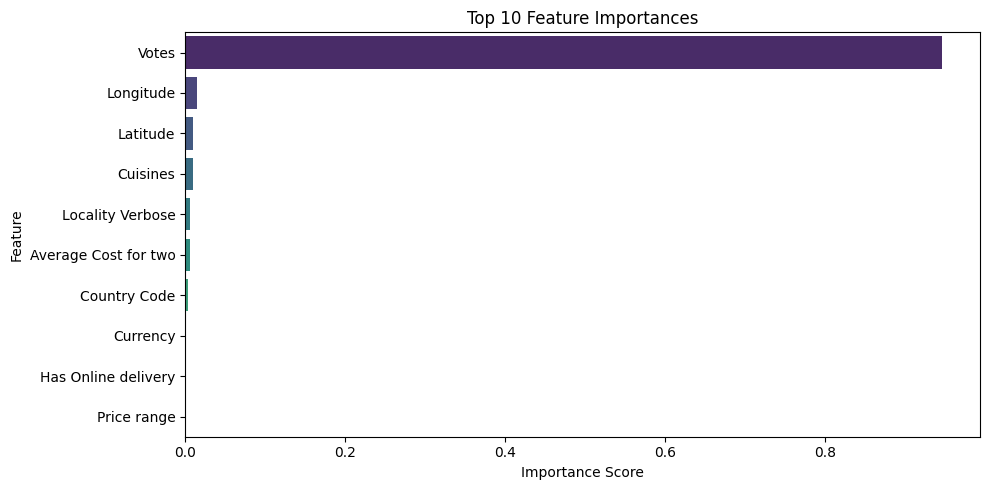

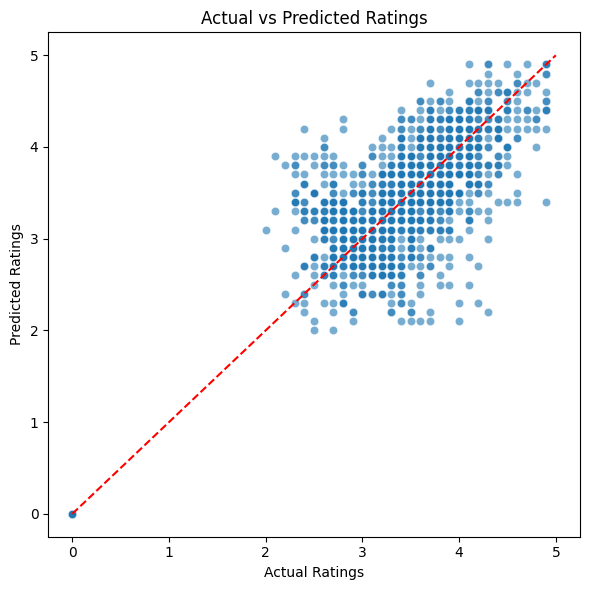

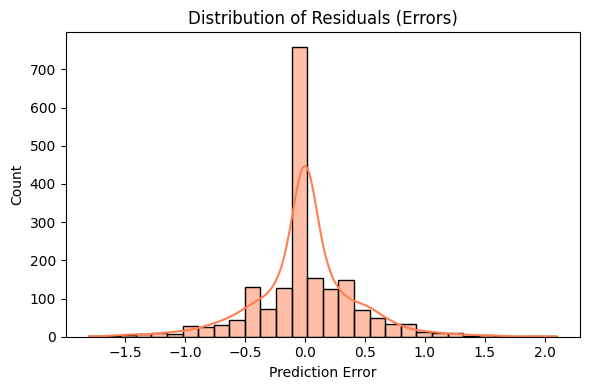

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#  Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cognifyz/Dataset .csv')
print("Dataset shape:", df.shape)

#  Step 2: Handle missing values
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna(subset=['Cuisines'])  # Only 'Cuisines' had 9 missing; safe to drop

#  Step 3: Drop irrelevant columns
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'City', 'Rating color', 'Rating text']
df.drop(columns=drop_cols, inplace=True)

#  Step 4: Encode categorical features
cat_cols = ['Country Code', 'Locality Verbose', 'Currency', 'Cuisines',
            'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#  Step 5: Define features and target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

#  Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 7: Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#  Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

#  Step 9: Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Influential Features:\n", feature_importance.head())

#  Step 10: Visualization

# --- Rating Distribution ---
plt.figure(figsize=(6, 4))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Feature Importance ---
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], hue=feature_importance.index[:10], palette='viridis', legend=False)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Actual vs Predicted ---
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.tight_layout()
plt.show()

# --- Residuals Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
